In [7]:
import pandas as pd
import numpy


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("./testseries.csv",header=0, index_col=0)

In [4]:
df.head(10)

,Price
Date,
1,-0.028579
2,0.098161
3,-0.011850
4,0.018509
5,-0.071410
6,-0.079382
7,0.025150
8,-0.038552
9,-0.048603


In [5]:
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as ply

<AxesSubplot:xlabel='Date'>

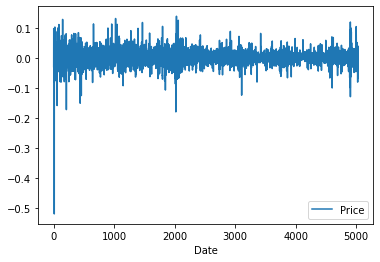

In [6]:
df.plot()

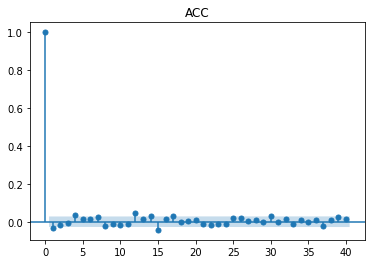

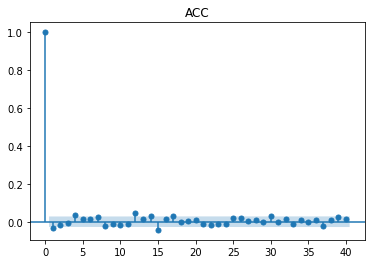

In [25]:
tsa.plot_acf(df, lags=40, alpha=0.05, title="ACC")

In [15]:
import statsmodels.stats.diagnostic as diag

In [233]:
diag.acorr_ljungbox(df['Price'], lags=[1], boxpierce=True)

(array([4.92567347]),
 array([0.02646049]),
 array([4.92273686]),
 array([0.0265055]))

In [221]:
p_value = diag.acorr_ljungbox(df['Price'], lags=[70], boxpierce=True)

/Users/Arthur/Developer/Projects/TDAmeritrade-API-Tasks/venv/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [224]:
lag_and_p = pandas.DataFrame()

In [234]:
for i in range(1,5000):
    p_value = diag.acorr_ljungbox(df['Price'], lags=[i], boxpierce=True,return_df=True)
    lag_and_p = lag_and_p.append(p_value)

In [235]:
lag_and_p

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,4.925673,2.646049e-02,4.922737,0.026505
2,6.318302,4.246177e-02,6.314259,0.042548
3,6.719090,8.141124e-02,6.714648,0.081571
4,13.651039,8.496257e-03,13.638332,0.008543
5,15.069462,1.006962e-02,15.054782,0.010131
...,...,...,...,...
4995,7282.578337,2.907925e-90,2510.722611,1.000000
4996,7302.709755,1.462808e-91,2510.858634,1.000000
4997,7364.317648,9.422189e-96,2511.262660,1.000000
4998,7364.886694,1.044133e-95,2511.266279,1.000000


<AxesSubplot:>

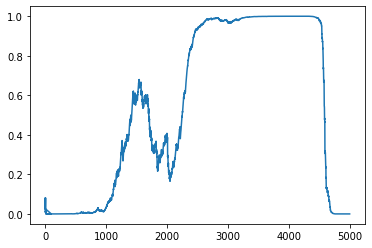

In [236]:
lag_and_p['lb_pvalue'].plot()

In [244]:
lag_and_p2 = pd.DataFrame()

In [245]:
for i in range(1,100):
    p_value = diag.acorr_ljungbox(df['Price'], lags=[i], boxpierce=True,return_df=True)
    lag_and_p2 = lag_and_p2.append(p_value)

In [246]:
lag_and_p2

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,4.925673,0.026460,4.922737,0.026505
2,6.318302,0.042462,6.314259,0.042548
3,6.719090,0.081411,6.714648,0.081571
4,13.651039,0.008496,13.638332,0.008543
5,15.069462,0.010070,15.054782,0.010131
...,...,...,...,...
95,160.853531,0.000029,159.421885,0.000039
96,160.991293,0.000037,159.556965,0.000050
97,165.896762,0.000017,164.365923,0.000023
98,166.998080,0.000017,165.445355,0.000024


<AxesSubplot:>

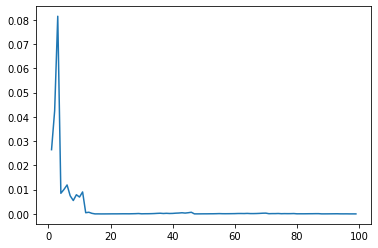

In [247]:
lag_and_p2['lb_pvalue'].plot()

In [250]:
diag.acorr_ljungbox(df['Price'], lags=[8], boxpierce=True,return_df=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
8,21.692234,0.005519,21.665478,0.005575


In [31]:
import statsmodels.api as sm

In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [37]:
idc = pd.read_csv('./intraday_change.csv',header=0, index_col=0)

In [38]:
idc.head(10)

,Price
Date,
0,-0.029
1,-0.044
2,0.098
3,0.003
4,0.028
5,-0.031
6,0.037
7,0.014
8,-0.035


<AxesSubplot:xlabel='Date'>

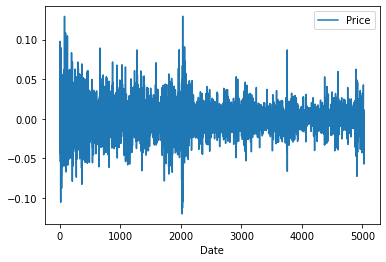

In [39]:
idc.plot()

In [43]:
diag.acorr_ljungbox(idc['Price'], lags=[8], boxpierce=True, model_df=0, period=None, return_df=True, auto_lag=False)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
8,48.069,0.000,48.022,0.000


In [160]:
PV

(array([57.29661321]),
 array([1.17240751e-08]),
 array([57.2295851]),
 array([1.20691283e-08]))

In [32]:
idc

,Price
Date,
0,-0.029082
1,-0.043560
2,0.097851
3,0.003138
4,0.027617
...,...
5026,-0.009917
5027,0.000512
5028,-0.057079


In [35]:
diag.acorr_ljungbox(idc['Price'], lags=[1], boxpierce=True,return_df=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,25.414229,4.624943e-07,25.39908,4.661403e-07


In [20]:
lag_and_p_idc = pd.DataFrame()
for i in range(1,5000):
    p_value = diag.acorr_ljungbox(idc['Price'], lags=[i], boxpierce=True,return_df=True)
    lag_and_p_idc = lag_and_p_idc.append(p_value)

In [50]:
lag_and_p_idc

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,25.414,0.000,25.399,0.000
2,25.676,0.000,25.661,0.000
3,25.970,0.000,25.955,0.000
4,39.082,0.000,39.051,0.000
5,39.237,0.000,39.206,0.000
...,...,...,...,...
4995,5598.330,0.000,2483.019,1.000
4996,5605.170,0.000,2483.066,1.000
4997,5607.246,0.000,2483.080,1.000
4998,5615.068,0.000,2483.132,1.000


In [51]:
lag_and_p_idc.to_csv('./lpidc.csv')

<AxesSubplot:>

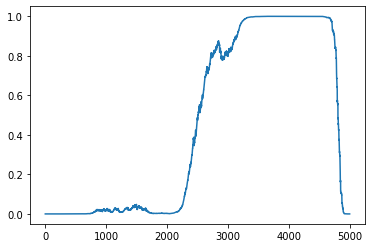

In [49]:
lag_and_p_idc['lb_pvalue'].plot()

In [27]:
diag.acorr_ljungbox(idc['Price'], lags=[8], boxpierce=True,return_df=False)

(array([48.06872702]),
 array([9.5850855e-08]),
 array([48.02247656]),
 array([9.78225662e-08]))

In [26]:
c = diag.acorr_ljungbox(idc['Price'], lags=[8], boxpierce=True,return_df=True)

KeyError: 1

In [6]:
df2 = pd.read_csv("./lpidc.csv")

NameError: name 'pd' is not defined

In [55]:
df2

,Unnamed: 0,lb_stat,lb_pvalue,bp_stat,bp_pvalue,base
0,1,25.414,0.000,25.399,0.000,0.050
1,2,25.676,0.000,25.661,0.000,0.050
2,3,25.970,0.000,25.955,0.000,0.050
3,4,39.082,0.000,39.051,0.000,0.050
4,5,39.237,0.000,39.206,0.000,0.050
...,...,...,...,...,...,...
4994,4995,5598.330,0.000,2483.019,1.000,0.050
4995,4996,5605.170,0.000,2483.066,1.000,0.050
4996,4997,5607.246,0.000,2483.080,1.000,0.050
4997,4998,5615.068,0.000,2483.132,1.000,0.050


In [4]:
import matplotlib.pyplot as plt

In [5]:
fig, ax = plt.subplots()
ax.plot(df2['lb_pvalue'])
plt.show()

NameError: name 'df2' is not defined

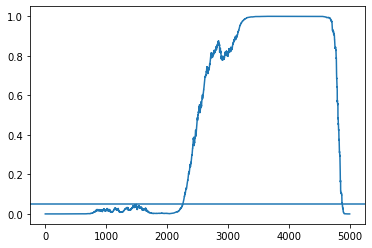

In [63]:
df2['lb_pvalue'].plot().axhline(y=0.05)

Generate real white noise

In [65]:
mean = 0
std = 1
num_samples = 5000
samples = numpy.random.normal(mean, std, size=num_samples)


In [66]:
whitenoise = pd.DataFrame(samples)

In [3]:
whitenoise

NameError: name 'whitenoise' is not defined

In [68]:
white_noise_df = pd.DataFrame()
for i in range(1,5000):
    p_value = diag.acorr_ljungbox(whitenoise, lags=[i], boxpierce=True,return_df=True)
    white_noise_df = white_noise_df.append(p_value)

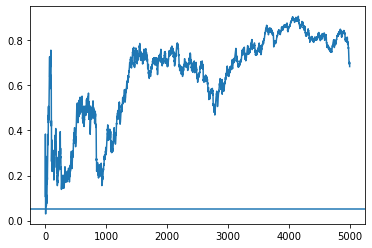

In [69]:
white_noise_df['lb_pvalue'].plot().axhline(y=0.05)

In [1]:
from scipy import signal

In [2]:
freqs,times,spectrogram = signal.spectrogram(whitenoise)

NameError: name 'whitenoise' is not defined